# Intelligent Portfolio Management via NLP Analysis on Financial 10-K Statements

### Install Packages

In [1]:
import sys

!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 18.9MB 2.0MB/s eta 0:00:01   34% |███████████                     | 6.5MB 21.6MB/s eta 0:00:01    44% |██████████████▎                 | 8.4MB 21.6MB/s eta 0:00:01    60% |███████████████████▍            | 11.5MB 22.0MB/s eta 0:00:01    71% |███████████████████████         | 13.6MB 23.3MB/s eta 0:00:01    77% |████████████████████████▊       | 14.6MB 21.7MB/s eta 0:00:01    93% |██████████████████████████████  | 17.7MB 20.6MB/s eta 0:00:01
    100% |████████████████████████████████| 1.4MB 11.8MB/s ta 0:00:01   9% |███                             | 133kB 19.0MB/s eta 0:00:01
    100% |████████████████████████████████| 17.0MB 1.8MB/s eta 0:00:01  2% |▉                               | 460kB 17.7MB/s eta 0:00:01    7% |██▌                             | 1.3MB 19.2MB/s eta 0:00:01    13% |████▌                           | 2.4MB 20.2MB/s eta 0:00:01    25% |████████                        | 4.3MB 20.6MB/s eta 0:00:01    36% |███████████▊            

### Load Packages

In [2]:
import nltk
import numpy as np
import pandas as pd
import pickle
import pprint
import project_helper
import project_tests

from tqdm import tqdm

### Download NLP Corpora
Here we need two corpora to run this project: the stopwords corpus for removing stopwords and wordnet for lemmatizing.

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
!pip install pandas==0.23.3

## Get 10ks
Here, we will be running NLP analysis on 10-k documents. To do that, we first need to download the documents. For this project, we'll download 10-ks for a few companies. To lookup documents for these companies, we'll use their CIK. If you would like to run this against other stocks, we've provided the dict `additional_cik` for more stocks. However, the more stocks you try, the long it will take to run.

## Creating a diversified portfolio
To test our hypothesis, I have taken a diversified portfolio. The portfolio contains 7 companies, all belonging from different sectors.

In [51]:
pricing = pricing.filter(['AMZN', 'LLY', 'CNP', 'XOM', 'NKE', 'FRT', 'BA'])
pricing.head()

ticker,AMZN,LLY,CNP,XOM,NKE,FRT,BA
date,,,,,,,
1962-01-01,nan,nan,nan,nan,nan,nan,0.64071188
1963-01-01,nan,nan,nan,nan,nan,nan,0.61913618
1964-01-01,nan,nan,nan,nan,nan,nan,1.18873457
1965-01-01,nan,nan,nan,nan,nan,nan,2.25681785
1966-01-01,nan,nan,nan,nan,nan,nan,1.13263776


In [52]:
pricing.tail()

ticker,AMZN,LLY,CNP,XOM,NKE,FRT,BA
date,,,,,,,
2014-01-01,310.35000000,62.89207161,19.98816704,81.45436267,46.12386666,120.93327682,118.05963288
2015-01-01,675.89000000,78.84732142,16.47694351,71.06372586,60.60044596,135.81997252,134.64696530
2016-01-01,749.87000000,70.66763184,23.21314562,85.20695722,49.87045562,135.50155863,149.88750981
2017-01-01,1169.47000000,83.27072791,27.76055779,81.97170489,62.18976773,130.63600821,291.93724356
2018-01-01,1699.73000000,86.56000000,27.75000000,82.31000000,76.55000000,126.28000000,333.18000000


In [53]:
cik_lookup = {
    'AMZN': '0001018724',
    'LLY': '0000059478',   
    'CNP': '0001130310',
    'XOM': '0000034088',
    'NKE': '0000320187',
    'FRT': '0000034903',
    'BA': '0000012927'}

In [54]:
data.tail()

,EOD/NKE - Adj_Close,EOD/AMZN - Adj_Close,EOD/LLY - Adj_Close,EOD/CNP - Adj_Close,EOD/XOM - Adj_Close,EOD/FRT - Adj_Close,EOD/BA - Adj_Close
Date,,,,,,,
2016-12-31,48.71997276,749.87000000,67.76311638,21.47765641,75.51173213,125.63876199,144.26808190
2017-12-31,60.75508539,1169.47000000,79.84821168,25.68508946,72.64460115,121.12736200,280.99223356
2018-12-31,72.81849743,1501.97000000,112.14461953,26.64533341,61.67406248,110.32123549,313.39217857
2019-12-31,100.56316987,1847.84000000,129.50269881,26.54040495,66.14668434,124.10869121,323.81890018
2020-12-31,130.06000000,3195.69000000,148.96000000,20.65000000,33.50000000,77.65000000,164.61000000


In [55]:
idx = pricing.index

In [56]:
pricing.loc[pd.to_datetime('2019-01-01')] = [1847.84000000, 129.50269881, 26.54040495, 66.14668434, 100.56316987, 124.10869121, 323.81890018]
pricing.tail()

ticker,AMZN,LLY,CNP,XOM,NKE,FRT,BA
date,,,,,,,
2015-01-01,675.89000000,78.84732142,16.47694351,71.06372586,60.60044596,135.81997252,134.64696530
2016-01-01,749.87000000,70.66763184,23.21314562,85.20695722,49.87045562,135.50155863,149.88750981
2017-01-01,1169.47000000,83.27072791,27.76055779,81.97170489,62.18976773,130.63600821,291.93724356
2018-01-01,1699.73000000,86.56000000,27.75000000,82.31000000,76.55000000,126.28000000,333.18000000
2019-01-01,1847.84000000,129.50269881,26.54040495,66.14668434,100.56316987,124.10869121,323.81890018


### Get list of 10-ks

In [151]:
sec_api = project_helper.SecAPI()

With the class constructed, let's pull a list of filled 10-ks from the SEC for each company.

In [152]:
from bs4 import BeautifulSoup

def get_sec_data(cik, doc_type, start=0, count=60):
    newest_pricing_data = pd.to_datetime('2018-01-01')
    rss_url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany' \
        '&CIK={}&type={}&start={}&count={}&owner=exclude&output=atom' \
        .format(cik, doc_type, start, count)
    sec_data = sec_api.get(rss_url)
    feed = BeautifulSoup(sec_data.encode('ascii'), 'xml').feed
    entries = [
        (
            entry.content.find('filing-href').getText(),
            entry.content.find('filing-type').getText(),
            entry.content.find('filing-date').getText())
        for entry in feed.find_all('entry', recursive=False)
        if pd.to_datetime(entry.content.find('filing-date').getText()) <= newest_pricing_data]

    return entries

Let's pull the list using the `get_sec_data` function, then display some of the results. For displaying some of the data, we'll use Amazon as an example. 

In [153]:
example_ticker = 'NKE'
sec_data = {}


for ticker, cik in cik_lookup.items():
    sec_data[ticker] = get_sec_data(cik, '10-K')
    

pprint.pprint(sec_data['AMZN'][:5])

[('https://www.sec.gov/Archives/edgar/data/1018724/000101872417000011/0001018724-17-000011-index.htm',
  '10-K',
  '2017-02-10'),
 ('https://www.sec.gov/Archives/edgar/data/1018724/000101872416000172/0001018724-16-000172-index.htm',
  '10-K',
  '2016-01-29'),
 ('https://www.sec.gov/Archives/edgar/data/1018724/000101872415000006/0001018724-15-000006-index.htm',
  '10-K',
  '2015-01-30'),
 ('https://www.sec.gov/Archives/edgar/data/1018724/000101872414000006/0001018724-14-000006-index.htm',
  '10-K',
  '2014-01-31'),
 ('https://www.sec.gov/Archives/edgar/data/1018724/000119312513028520/0001193125-13-028520-index.htm',
  '10-K',
  '2013-01-30')]


### Download 10-ks
As you see, this is a list of urls. These urls point to a file that contains metadata related to each filling. Since we don't care about the metadata, we'll pull the filling by replacing the url with the filling url.

In [154]:
raw_fillings_by_ticker = {}

for ticker, data in sec_data.items():
    raw_fillings_by_ticker[ticker] = {}
    for index_url, file_type, file_date in tqdm(data, desc='Downloading {} Fillings'.format(ticker), unit='filling'):
        if (file_type == '10-K'):
            file_url = index_url.replace('-index.htm', '.txt').replace('.txtl', '.txt')            
            
            raw_fillings_by_ticker[ticker][file_date] = sec_api.get(file_url)


print('Example Document:\n\n{}...'.format(next(iter(raw_fillings_by_ticker[example_ticker].values()))[:1000]))

Example Document:

<SEC-DOCUMENT>0000320187-17-000090.txt : 20170720
<SEC-HEADER>0000320187-17-000090.hdr.sgml : 20170720
<ACCEPTANCE-DATETIME>20170720161816
ACCESSION NUMBER:		0000320187-17-000090
CONFORMED SUBMISSION TYPE:	10-K
PUBLIC DOCUMENT COUNT:		98
CONFORMED PERIOD OF REPORT:	20170531
FILED AS OF DATE:		20170720
DATE AS OF CHANGE:		20170720

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			NIKE INC
		CENTRAL INDEX KEY:			0000320187
		STANDARD INDUSTRIAL CLASSIFICATION:	RUBBER & PLASTICS FOOTWEAR [3021]
		IRS NUMBER:				930584541
		STATE OF INCORPORATION:			OR
		FISCAL YEAR END:			0531

	FILING VALUES:
		FORM TYPE:		10-K
		SEC ACT:		1934 Act
		SEC FILE NUMBER:	001-10635
		FILM NUMBER:		17974568

	BUSINESS ADDRESS:	
		STREET 1:		ONE BOWERMAN DR
		CITY:			BEAVERTON
		STATE:			OR
		ZIP:			97005-6453
		BUSINESS PHONE:		5036713173

	MAIL ADDRESS:	
		STREET 1:		ONE BOWERMAN DR
		CITY:			BEAVERTON
		STATE:			OR
		ZIP:			97005-6453
</SEC-HEADER>
<DOCUMENT>
<TYPE>10-K
<SEQUENCE>1
<FIL

### Get Documents
With theses fillings downloaded, we want to break them into their associated documents. These documents are sectioned off in the fillings with the tags `<DOCUMENT>` for the start of each document and `</DOCUMENT>` for the end of each document. There's no overlap with these documents, so each `</DOCUMENT>` tag should come after the `<DOCUMENT>` with no `<DOCUMENT>` tag in between.


In [1]:
import re


def get_documents(text):
    """
    Extract the documents from the text

    Parameters
    ----------
    text : str
        The text with the document strings inside

    Returns
    -------
    extracted_docs : list of str
        The document strings found in `text`
    """
    
    # TODO: Implement
    final_docs = []
    start_regex = re.compile(r'<DOCUMENT>')
    end_regex = re.compile(r'</DOCUMENT>')
    
    start_idx = [x.end() for x in re.finditer(start_regex, text)]
    end_idx = [x.start() for x in re.finditer(end_regex, text)]
    
    for start_i, end_i in zip(start_idx, end_idx):
        final_docs.append(text[start_i:end_i])
    
    
    return final_docs


With the `get_documents` function implemented, let's extract all the documents.

In [156]:
filling_documents_by_ticker = {}

for ticker, raw_fillings in raw_fillings_by_ticker.items():
    filling_documents_by_ticker[ticker] = {}
    for file_date, filling in tqdm(raw_fillings.items(), desc='Getting Documents from {} Fillings'.format(ticker), unit='filling'):
        filling_documents_by_ticker[ticker][file_date] = get_documents(filling)


print('\n\n'.join([
    'Document {} Filed on {}:\n{}...'.format(doc_i, file_date, doc[:200])
    for file_date, docs in filling_documents_by_ticker[example_ticker].items()
    for doc_i, doc in enumerate(docs)][:3]))

Getting Documents from BA Fillings: 100%|██████████| 24/24 [00:04<00:00,  5.97filling/s]

Document 0 Filed on 2017-07-20:

<TYPE>10-K
<SEQUENCE>1
<FILENAME>nke-5312017x10k.htm
<DESCRIPTION>10-K
<TEXT>
<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
	<head>
		<...

Document 1 Filed on 2017-07-20:

<TYPE>EX-10.20
<SEQUENCE>2
<FILENAME>nke-5312017xexhibit1020.htm
<DESCRIPTION>COVENANT NOT TO COMPETE AND NON-DISCLOSURE AGREEMENT
<TEXT>
<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN...

Document 2 Filed on 2017-07-20:

<TYPE>EX-12.1
<SEQUENCE>3
<FILENAME>nke-5312017xexhibit121.htm
<DESCRIPTION>COMPUTATION OF RATIO OF EARNINGS TO FIXED CHARGES
<TEXT>
<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "ht...


### Get Document Types
Now that we have all the documents, we want to find the 10-k form in this 10-k filing. The `get_document_type` function returns the type of document given. The document type is located on a line with the `<TYPE>` tag. For example, a form of type "TEST" would have the line `<TYPE>TEST`. 

In [2]:
def get_document_type(doc):
    """
    Return the document type lowercased

    Parameters
    ----------
    doc : str
        The document string

    Returns
    -------
    doc_type : str
        The document type lowercased
    """
    
    # TODO: Implement
    # Regex explaination : Here I am tryng to do a positive lookbehind
    # (?<=a)b (positive lookbehind) matches the b (and only the b) in cab, but does not match bed or debt.
    # More reference : https://www.regular-expressions.info/lookaround.html
    
    type_regex = re.compile(r'(?<=<TYPE>)\w+[^\n]+') # gives out \w
    type_idx = re.search(type_regex, doc).group(0).lower()
    return type_idx




With the `get_document_type` function, we'll filter out all non 10-k documents.

In [158]:
ten_ks_by_ticker = {}

for ticker, filling_documents in filling_documents_by_ticker.items():
    ten_ks_by_ticker[ticker] = []
    for file_date, documents in filling_documents.items():
        for document in documents:
            if get_document_type(document) == '10-k':
                ten_ks_by_ticker[ticker].append({
                    'CIK': cik_lookup[ticker],
                    'ten_k': document,
                    'file_date': file_date})

example_ticker='NKE'
project_helper.print_ten_k_data(ten_ks_by_ticker[example_ticker][:5], ['CIK', 'ten_k', 'file_date'])

[
  {
    CIK: '0000320187'
    ten_k: '\n<TYPE>10-K\n<SEQUENCE>1\n<FILENAME>nke-5312017x...
    file_date: '2017-07-20'},
  {
    CIK: '0000320187'
    ten_k: '\n<TYPE>10-K\n<SEQUENCE>1\n<FILENAME>nke-5312016x...
    file_date: '2016-07-21'},
  {
    CIK: '0000320187'
    ten_k: '\n<TYPE>10-K\n<SEQUENCE>1\n<FILENAME>nke-5312015x...
    file_date: '2015-07-23'},
  {
    CIK: '0000320187'
    ten_k: '\n<TYPE>10-K\n<SEQUENCE>1\n<FILENAME>nke-5312014x...
    file_date: '2014-07-25'},
  {
    CIK: '0000320187'
    ten_k: '\n<TYPE>10-K\n<SEQUENCE>1\n<FILENAME>nke-5312013x...
    file_date: '2013-07-23'},
]


## Preprocess the Data
### Clean Up
As you can see, the text for the documents are very messy. To clean this up, we'll remove the html and lowercase all the text.

In [159]:
def remove_html_tags(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    return text


def clean_text(text):
    text = text.lower()
    text = remove_html_tags(text)
    
    return text

Using the `clean_text` function, we'll clean up all the documents.

In [160]:
for ticker, ten_ks in ten_ks_by_ticker.items():
    for ten_k in tqdm(ten_ks, desc='Cleaning {} 10-Ks'.format(ticker), unit='10-K'):
        ten_k['file_clean'] = clean_text(ten_k['ten_k'])


project_helper.print_ten_k_data(ten_ks_by_ticker[example_ticker][:5], ['file_clean'])

Cleaning BA 10-Ks: 100%|██████████| 24/24 [00:59<00:00,  2.47s/10-K]

[
  {
    file_clean: '\n10-k\n1\nnke-5312017x10k.htm\n10-k\n\n\n\n\n\n\...},
  {
    file_clean: '\n10-k\n1\nnke-5312016x10k.htm\n10-k\n\n\n\n\n\n\...},
  {
    file_clean: '\n10-k\n1\nnke-5312015x10k.htm\n10-k\n\n\n\n\n\n\...},
  {
    file_clean: '\n10-k\n1\nnke-5312014x10k.htm\n10-k\n\n\n\n\n\n\...},
  {
    file_clean: '\n10-k\n1\nnke-5312013x10k.htm\n10-k\n\n\n\n\n\n\...},
]


### Lemmatize
With the text cleaned up, it's time to distill the verbs down. The `lemmatize_words` function lemmatizes verbs in the list of words provided.

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


def lemmatize_words(words):
    """
    Lemmatize words 

    Parameters
    ----------
    words : list of str
        List of words

    Returns
    -------
    lemmatized_words : list of str
        List of lemmatized words
    """
    
    # TODO: Implement
    wnl = WordNetLemmatizer()
    lemmatized_words = [wnl.lemmatize(word, 'v') for word in words]
    
    return lemmatized_words

With the `lemmatize_words` function implemented, let's lemmatize all the data.

In [162]:
word_pattern = re.compile('\w+')

for ticker, ten_ks in ten_ks_by_ticker.items():
    for ten_k in tqdm(ten_ks, desc='Lemmatize {} 10-Ks'.format(ticker), unit='10-K'):
        ten_k['preprocessed_ten_k'] = lemmatize_words(word_pattern.findall(ten_k['file_clean']))


project_helper.print_ten_k_data(ten_ks_by_ticker['NKE'][:5], ['preprocessed_ten_k'])

Lemmatize BA 10-Ks: 100%|██████████| 24/24 [00:09<00:00,  2.5810-K/s]

[
  {
    preprocessed_ten_k: '['10', 'k', '1', 'nke', '5312017x10k', 'htm', '10...},
  {
    preprocessed_ten_k: '['10', 'k', '1', 'nke', '5312016x10k', 'htm', '10...},
  {
    preprocessed_ten_k: '['10', 'k', '1', 'nke', '5312015x10k', 'htm', '10...},
  {
    preprocessed_ten_k: '['10', 'k', '1', 'nke', '5312014x10k', 'htm', '10...},
  {
    preprocessed_ten_k: '['10', 'k', '1', 'nke', '5312013x10k', 'htm', '10...},
]


### Remove Stopwords

In [163]:
from nltk.corpus import stopwords


lemma_english_stopwords = lemmatize_words(stopwords.words('english'))

for ticker, ten_ks in ten_ks_by_ticker.items():
    for ten_k in tqdm(ten_ks, desc='Remove Stop Words for {} 10-Ks'.format(ticker), unit='10-K'):
        ten_k['preprocessed_ten_k'] = [word for word in ten_k['preprocessed_ten_k'] if word not in lemma_english_stopwords]


print('Stop Words Removed')

Remove Stop Words for BA 10-Ks: 100%|██████████| 24/24 [00:04<00:00,  5.9510-K/s]

Stop Words Removed


## Analysis on 10ks
### Loughran McDonald Sentiment Word Lists
We'll be using the Loughran and McDonald sentiment word lists. These word lists cover the following sentiment:
- Negative 
- Positive
- Uncertainty
- Litigious
- Constraining
- Superfluous
- Modal

This will allow us to do the sentiment analysis on the 10-ks. Let's first load these word lists. We'll be looking into a few of these sentiments.

In [165]:
import os
import pandas as pd

sentiments = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'interesting']

sentiment_df = pd.read_csv(os.path.join('..', '..', 'data', 'project_5_loughran_mcdonald', 'loughran_mcdonald_master_dic_2016.csv'))
sentiment_df.columns = [column.lower() for column in sentiment_df.columns] # Lowercase the columns for ease of use

# Remove unused information
sentiment_df = sentiment_df[sentiments + ['word']]
sentiment_df[sentiments] = sentiment_df[sentiments].astype(bool)
sentiment_df = sentiment_df[(sentiment_df[sentiments]).any(1)]

# Apply the same preprocessing to these words as the 10-k words
sentiment_df['word'] = lemmatize_words(sentiment_df['word'].str.lower())
sentiment_df = sentiment_df.drop_duplicates('word')


sentiment_df.tail()

,negative,positive,uncertainty,litigious,constraining,interesting,word
84770,True,False,False,False,False,False,wrongdoing
84771,True,False,False,False,False,False,wrongdoings
84775,True,False,False,False,False,False,wrongful
84776,True,False,False,False,False,False,wrongfully
84784,True,False,False,False,False,False,wrongly


### Bag of Words
using the sentiment word lists, let's generate sentiment bag of words from the 10-k documents. The `get_bag_of_words` function generates a bag of words that counts the number of sentiment words in each doc. 

In [4]:
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer


def get_bag_of_words(sentiment_words, docs):
    """
    Generate a bag of words from documents for a certain sentiment

    Parameters
    ----------
    sentiment_words: Pandas Series
        Words that signify a certain sentiment
    docs : list of str
        List of documents used to generate bag of words

    Returns
    -------
    bag_of_words : 2-d Numpy Ndarray of int
        Bag of words sentiment for each document
        The first dimension is the document.
        The second dimension is the word.
    """
    
    # reference : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
    
    c_vectorizer = CountVectorizer(vocabulary=sentiment_words.values)
    
    # tokenization
    X = c_vectorizer.fit_transform(docs)
    
    return X.toarray()


Using the `get_bag_of_words` function, we'll generate a bag of words for all the documents.

In [167]:
sentiment_bow_ten_ks = {}

for ticker, ten_ks in ten_ks_by_ticker.items():
    lemma_docs = [' '.join(ten_k['preprocessed_ten_k']) for ten_k in ten_ks]
    print(len(lemma_docs))
    #print(lemma_docs[:2])
    
    sentiment_bow_ten_ks[ticker] = {
        sentiment: get_bag_of_words(sentiment_df[sentiment_df[sentiment]]['word'], lemma_docs)
        for sentiment in sentiments}

17
21
15
22
21
19
24
[
  {
    negative: '[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 0 0...
    positive: '[[9 0 0 ..., 0 0 0]\n [9 0 0 ..., 0 0 0]\n [9 0 0...
    uncertainty: '[[ 0  0  1 ...,  2  3 17]\n [ 0  0  1 ...,  2  3 ...
    litigious: '[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 0 0...
    constraining: '[[0 2 0 ..., 0 0 0]\n [0 2 0 ..., 0 0 0]\n [0 2 0...
    interesting: '[[1 0 0 ..., 0 0 0]\n [1 0 0 ..., 0 0 0]\n [1 0 0...},
]


Using the `get_jaccard_similarity` function, let's plot the similarities over time.

### TFIDF
using the sentiment word lists, let's generate sentiment TFIDF from the 10-k documents. The `get_tfidf` function generates TFIDF from each document, using sentiment words as the terms. 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer


def get_tfidf(sentiment_words, docs):
    """
    Generate TFIDF values from documents for a certain sentiment

    Parameters
    ----------
    sentiment_words: Pandas Series
        Words that signify a certain sentiment
    docs : list of str
        List of documents used to generate bag of words

    Returns
    -------
    tfidf : 2-d Numpy Ndarray of float
        TFIDF sentiment for each document
        The first dimension is the document.
        The second dimension is the word.
    """
    
    # TODO: Implement
    tfidf_vector = TfidfVectorizer(vocabulary=sentiment_words.values)
    X = tfidf_vector.fit_transform(docs)
    
    return X.toarray()


Using the `get_tfidf` function, let's generate the TFIDF values for all the documents.

In [172]:
sentiment_tfidf_ten_ks = {}

for ticker, ten_ks in ten_ks_by_ticker.items():
    lemma_docs = [' '.join(ten_k['preprocessed_ten_k']) for ten_k in ten_ks]
    
    sentiment_tfidf_ten_ks[ticker] = {
        sentiment: get_tfidf(sentiment_df[sentiment_df[sentiment]]['word'], lemma_docs)
        for sentiment in sentiments}


[
  {
    negative: '[[ 0.  0.  0. ...,  0.  0.  0.]\n [ 0.  0.  0. .....
    positive: '[[ 0.10940495  0.          0.         ...,  0.   ...
    uncertainty: '[[ 0.          0.          0.00263439 ...,  0.007...
    litigious: '[[ 0.  0.  0. ...,  0.  0.  0.]\n [ 0.  0.  0. .....
    constraining: '[[ 0.          0.02561362  0.         ...,  0.   ...
    interesting: '[[ 0.00467568  0.          0.         ...,  0.   ...},
]


### Cosine Similarity
Using the TFIDF values, we'll calculate the cosine similarity and plot it over time. Function `get_cosine_similarity`  returns the cosine similarities between each tick in time. Since the input, `tfidf_matrix`, is a TFIDF vector for each time period in order, we just need to computer the cosine similarities for each neighboring vector.

In [6]:
from sklearn.metrics.pairwise import cosine_similarity


def get_cosine_similarity(tfidf_matrix):
    """
    Get cosine similarities for each neighboring TFIDF vector/document

    Parameters
    ----------
    tfidf : 2-d Numpy Ndarray of float
        TFIDF sentiment for each document
        The first dimension is the document.
        The second dimension is the word.

    Returns
    -------
    cosine_similarities : list of float
        Cosine similarities for neighboring documents
    """
    
    # TODO: Implement
    # Use k>0 for diagonals above the main diagonal, and k<0 for diagonals below the main diagonal.
    cosine_sim = list(np.diag(cosine_similarity(tfidf_matrix, tfidf_matrix), k=1))
    #print(cosine_sim)
    return cosine_sim


In [174]:
cik_lookup = {
    'AMZN': '0001018724',
    'LLY': '0000059478',   
    'CNP': '0001130310',
    'XOM': '0000034088',
    'NKE': '0000320187',
    'FRT': '0000034903',
    'BA': '0000012927'}

Let's plot the cosine similarities over time.

negative = [0.98431114162338007, 0.99037047297085057, 0.99021273198863835, 0.96815726216763043, 0.97972290373447191, 0.98380272386352263, 0.9800784195072233, 0.97417601601869874, 0.96817200448645624, 0.97986414372584052, 0.95094070267614772, 0.94833579367193643, 0.90449923679845246, 0.9356766219564725, 0.73475381687218722, 0.76463549655228635, 0.90650841757975797, 0.71727732621060325, 0.57739092293041261, 0.63772300952814276, 0.61740082360731408, 0.9215537370703013, 0.86990102048943763]

positive = [0.99694333190095996, 0.99820168711676127, 0.9977519415644186, 0.99792359626227056, 0.98915277965019432, 0.99161093488300089, 0.99326240222250839, 0.99545865133840461, 0.98957973148159373, 0.99115818536634248, 0.98727578217091105, 0.97559268792354015, 0.9772759417379987, 0.96293937848790712, 0.50012826685462231, 0.47858141440826651, 0.97847386435334727, 0.94801490585620851, 0.22126690649420189, 0.26849014171030661, 0.77671418061443209, 0.86285717711905363, 0.843177844634447]

litigious = [0.

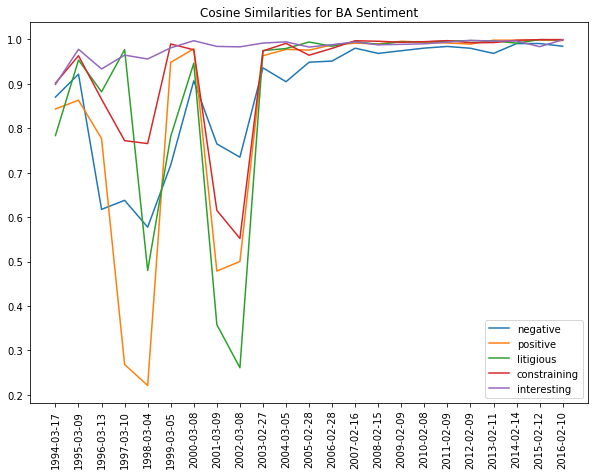

In [175]:
cosine_similarities = {
    ticker: {
        sentiment_name: get_cosine_similarity(sentiment_values)
        for sentiment_name, sentiment_values in ten_k_sentiments.items()}
    for ticker, ten_k_sentiments in sentiment_tfidf_ten_ks.items()}

example_ticker = 'BA'
sentiments =['negative', 'positive', 'litigious', 'constraining', 'interesting']
for sentiment in sentiments:
    print('{} = {}\n'.format(sentiment, cosine_similarities[example_ticker][sentiment]))

print('{} = {}'.format('date', file_dates[example_ticker][1:]))

project_helper.plot_similarities(
    [cosine_similarities[example_ticker][sentiment] for sentiment in sentiments],
    file_dates[example_ticker][1:],
    'Cosine Similarities for {} Sentiment'.format(example_ticker),
    sentiments)

## Evaluate Alpha Factors
Let's evaluate the alpha factors. 
### Price Data
Let's get yearly pricing to run the factor against, since 10-Ks are produced annually.

### Dict to DataFrame
The alphalens library uses dataframes, so we we'll need to turn our dictionary into a dataframe. 

In [186]:
# 5 year data was curated by using Quandl end of day US Stock Prices database, Accessed: 2020-10
pricing = pd.read_csv('../../data/project_5_yr/yr-quotemedia.csv', parse_dates=['date'])
pricing = pricing.pivot(index='date', columns='ticker', values='adj_close')


pricing.head()

ticker,A,AA,AAAP,AABA,AAC,AADR,AAIT,AAL,AAMC,AAME,...,ZUMZ,ZUO,ZVZZC,ZVZZCNX,ZX,ZXYZ_A,ZYME,ZYNE,ZZK,ZZZ
date,,,,,,,,,,,,,,,,,,,,,
1962-01-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1963-01-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1964-01-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1965-01-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1966-01-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [187]:
cosine_similarities_df_dict = {'date': [], 'ticker': [], 'sentiment': [], 'value': []}


for ticker, ten_k_sentiments in cosine_similarities.items():
    for sentiment_name, sentiment_values in ten_k_sentiments.items():
        for sentiment_values, sentiment_value in enumerate(sentiment_values):
            cosine_similarities_df_dict['ticker'].append(ticker)
            cosine_similarities_df_dict['sentiment'].append(sentiment_name)
            cosine_similarities_df_dict['value'].append(sentiment_value)
            cosine_similarities_df_dict['date'].append(file_dates[ticker][1:][sentiment_values])

cosine_similarities_df = pd.DataFrame(cosine_similarities_df_dict)
cosine_similarities_df['date'] = pd.DatetimeIndex(cosine_similarities_df['date']).year
cosine_similarities_df['date'] = pd.to_datetime(cosine_similarities_df['date'], format='%Y')


cosine_similarities_df.head(20)

,date,ticker,sentiment,value
0,2016-01-01,AMZN,negative,0.98065125
1,2015-01-01,AMZN,negative,0.95951741
2,2014-01-01,AMZN,negative,0.98838551
3,2013-01-01,AMZN,negative,0.97472377
4,2012-01-01,AMZN,negative,0.97585100
5,2011-01-01,AMZN,negative,0.97658031
6,2010-01-01,AMZN,negative,0.98103103
7,2009-01-01,AMZN,negative,0.93653965
8,2008-01-01,AMZN,negative,0.98808037
9,2007-01-01,AMZN,negative,0.98288202


### Alphalens Format
In order to use a lot of the alphalens functions, we need to aligned the indices and convert the time to unix timestamp. In this next cell, we'll do just that.

In [188]:
import alphalens as al


factor_data = {}
skipped_sentiments = []

for sentiment in sentiments:
    cs_df = cosine_similarities_df[(cosine_similarities_df['sentiment'] == sentiment)]
    cs_df = cs_df.pivot(index='date', columns='ticker', values='value')

    try:
        data = al.utils.get_clean_factor_and_forward_returns(cs_df.stack(), pricing, quantiles=5, bins=None, periods=[1])
        factor_data[sentiment] = data
    except Exception as e:
        print(e)
        skipped_sentiments.append(sentiment)

if skipped_sentiments:
    print('\nSkipped the following sentiments:\n{}'.format('\n'.join(skipped_sentiments)))
factor_data[sentiments[0]].head()

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                       
1994-01-01 BA    0.69666598 0.86990102                5
           FRT   0.17159556 0.47730392                1
           LLY   0.77387678 0.48325900                2
           XOM   0.39421669 0.71147771                4
1995-01-01 BA    0.37622173 0.92155374                3

### Alphalens Format with Unix Time
Alphalen's `factor_rank_autocorrelation` and `mean_return_by_quantile` functions require unix timestamps to work, so we'll also create factor dataframes with unix time.

In [189]:
unixt_factor_data = {
    factor: data.set_index(pd.MultiIndex.from_tuples(
        [(x.timestamp(), y) for x, y in data.index.values],
        names=['date', 'asset']))
    for factor, data in factor_data.items()}

In [190]:
# !pip install pandas==0.23.3

### Factor Returns
Let's view the factor returns over time. We should be seeing it generally move up and to the right.

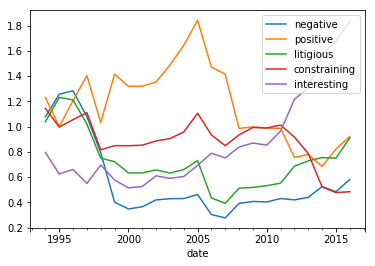

In [191]:
ls_factor_returns = pd.DataFrame()

for factor_name, data in factor_data.items():
    ls_factor_returns[factor_name] = al.performance.factor_returns(data).iloc[:, 0]

(1 + ls_factor_returns).cumprod().plot()

In [192]:
(1 + ls_factor_returns).cumprod()


,negative,positive,litigious,constraining,interesting
date,,,,,
1994-01-01,1.07783158,1.22948522,1.03736869,1.14338904,0.79465418
1995-01-01,1.25570995,0.99927924,1.23057429,0.99592302,0.62405698
1996-01-01,1.28334794,1.20477159,1.21111898,1.05407954,0.66007750
1997-01-01,1.07836475,1.40322961,1.01912584,1.10952651,0.54914314
1998-01-01,0.79271995,1.03153234,0.74917266,0.81562737,0.69460401
1999-01-01,0.40024761,1.41513221,0.72170192,0.84857263,0.57643152
2000-01-01,0.34733111,1.31934719,0.63270725,0.84809568,0.51386187
2001-01-01,0.36411780,1.32020254,0.63261812,0.85211241,0.52477385
2002-01-01,0.41862029,1.35249926,0.65663356,0.88604649,0.60924239


### Basis Points Per Day per Quantile
It is not enough to look just at the factor weighted return. A good alpha is also monotonic in quantiles. Let's looks the basis points for the factor returns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29097340f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f290985e9e8>]], dtype=object)

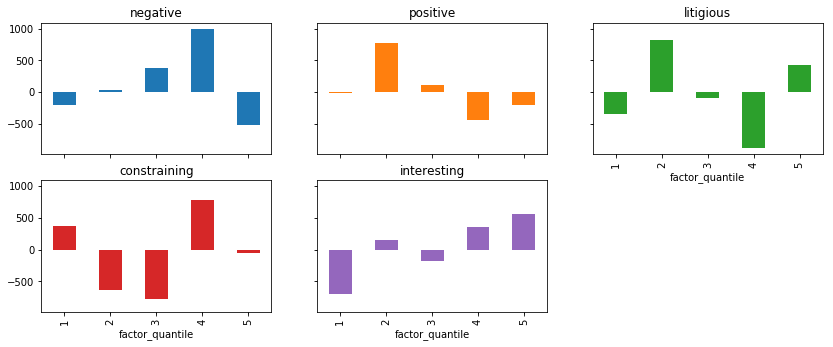

In [197]:
qr_factor_returns = pd.DataFrame()

for factor_name, data in unixt_factor_data.items():
    qr_factor_returns[factor_name] = al.performance.mean_return_by_quantile(data)[0].iloc[:, 0]

(10000*qr_factor_returns).plot.bar(
    subplots=True,
    sharey=True,
    layout=(5,3),
    figsize=(14, 14),
    legend=False)

### Turnover Analysis
Without doing a full and formal backtest, we can analyze how stable the alphas are over time. Stability in this sense means that from period to period, the alpha ranks do not change much. Since trading is costly, we always prefer, all other things being equal, that the ranks do not change significantly per period. We can measure this with the **Factor Rank Autocorrelation (FRA)**.

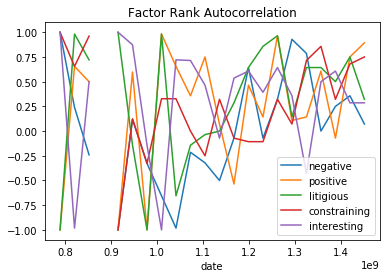

In [198]:
ls_FRA = pd.DataFrame()

for factor, data in unixt_factor_data.items():
    ls_FRA[factor] = al.performance.factor_rank_autocorrelation(data)

ls_FRA.plot(title="Factor Rank Autocorrelation")

### Sharpe Ratio of the Alphas
The last analysis we'll do on the factors will be sharpe ratio. Let's see what the sharpe ratio for the factors are. Generally, a Sharpe Ratio of near 1.0 or higher is an acceptable single alpha for this universe.

In [201]:
daily_annualization_factor = np.sqrt(252)

(daily_annualization_factor * ls_factor_returns.mean() / ls_factor_returns.std()).round(2)

negative       -0.24000000
positive        1.02000000
litigious       0.89000000
constraining   -2.98000000
interesting     4.10000000
dtype: float64